# <center> Coronavirus Pandemic (COVID-19) </center>
## <center> Country Profile: United Kingdom </center>

### <center> by Noaman Mangera </center>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather Data</a></li>
<li><a href="#assess">Assess & Clean</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#analysis">Question & Answers</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction 

<div class="alert alert-block alert-info">
This document explores the development of an infectious disease caused by a type of coronavirus, known as SARS-CoV-2.
    
   The dataset is a collection of the COVID-19 data maintained by Our World in Data. It is updated daily and includes metrics 
   on confirmed cases, deaths, and testing, as well as other variables of potential interest. A description of each variable is made available within the same repository in the csv labelled 'codebook.csv', along with the data source for each variable.
</div>



In [1]:
#import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlretrieve

In [2]:
#plot withinin notebook environment
%matplotlib inline

In [3]:
#prepare visualisations in notebook by setting global theme, a default plot size, font and color
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9,5)
plt.rcParams['figure.facecolor'] = '#00000000'

<a id='gather'></a>

## Gather Data

In [4]:
#download data from owid and save file locally
urlretrieve('https://covid.ourworldindata.org/data/owid-covid-data.csv', 
            'covid-daywise.csv')

('covid-daywise.csv', <http.client.HTTPMessage at 0x1da75470c48>)

In [5]:
#read in locally saved csv into dataframe
covid_df = pd.read_csv('covid-daywise.csv', index_col='date')

<a id='assess'></a>

## Assess & Clean

In [6]:
#visually inspect first five rows
covid_df.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,AFG,Asia,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-01,AFG,Asia,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-02,AFG,Asia,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-03,AFG,Asia,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2020-01-04,AFG,Asia,Afghanistan,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [7]:
#number of columns and rows 
covid_df.shape
print('This dataset contains {} rows and {} columns.'.format(covid_df.shape[0], covid_df.shape[1]))

This dataset contains 45850 rows and 40 columns.


In [8]:
#column names and data types
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45850 entries, 2019-12-31 to 2020-09-24
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         45581 non-null  object 
 1   continent                        45312 non-null  object 
 2   location                         45850 non-null  object 
 3   total_cases                      45236 non-null  float64
 4   new_cases                        45031 non-null  float64
 5   new_cases_smoothed               44249 non-null  float64
 6   total_deaths                     45236 non-null  float64
 7   new_deaths                       45031 non-null  float64
 8   new_deaths_smoothed              44249 non-null  float64
 9   total_cases_per_million          44967 non-null  float64
 10  new_cases_per_million            44967 non-null  float64
 11  new_cases_smoothed_per_million   44184 non-null  float64
 12  total_dea

**Observations:**

The entire dataset contains approximately 46,000 recorded observations (this number will continue to increase as data is added daily) and 40 features (variables). The focus for this analysis will be a subset of this data, namely the headline figures cases, deaths and tests for the UK.

In [9]:
#subset data for UK
covid_uk_df = covid_df.loc[covid_df['location'] == 'United Kingdom', ['new_cases','new_cases_smoothed', 'total_cases', 'new_tests', 'new_deaths','new_deaths_smoothed', 'total_deaths',
                                                                      'new_tests_smoothed', 'total_tests', 'positive_rate']].copy()
covid_uk_df.head()

,new_cases,new_cases_smoothed,total_cases,new_tests,new_deaths,new_deaths_smoothed,total_deaths,new_tests_smoothed,total_tests,positive_rate
date,,,,,,,,,,
2019-12-31,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN


**Observations**:

Data is recorded from the 31/12/2019 onwards.

In [10]:
#user defined function to calculate missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * (df.isnull().sum() / len(df))
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [11]:
#apply user defined function over subset of data
missing_values_table(covid_uk_df)

Your selected dataframe has 10 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
new_tests_smoothed,101,37.5
positive_rate,101,37.5
new_tests,94,34.9
total_tests,94,34.9
new_cases_smoothed,6,2.2
new_deaths_smoothed,6,2.2


**Observations**:

There is less data available for the number of new tests recorded (contains more null values) than the other variables. 

<div class="alert alert-block alert-info">
<b>The distinction between 0 and null values is subtle but important. In this dataset, it represents daily test numbers that were not reported on specific dates.
</div>

In [12]:
#first reported day of testing
covid_uk_df.new_tests.first_valid_index()

'2020-04-01'

**Observations**:

The UK only started publishing daily tests numbers on the 01/04/2020.

<a id='eda'></a>

## Exploratory Data Analysis

### Univariate Exploration

In [13]:
#summary statistics of numerical variables
covid_uk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
new_cases,269.0,1.523156e+03,1.622600e+03,0.000,5.600000e+01,928.000,2.621000e+03,6.178000e+03
new_cases_smoothed,263.0,1.501396e+03,1.548522e+03,0.000,8.714250e+01,970.429,2.544000e+03,4.846143e+03
total_cases,269.0,1.706411e+05,1.402400e+05,0.000,2.710000e+02,214306.000,2.952090e+05,4.097290e+05
new_tests,175.0,1.051608e+05,5.903500e+04,11896.000,6.694250e+04,93173.000,1.528825e+05,2.525090e+05
new_deaths,269.0,1.556208e+02,2.771097e+02,0.000,0.000000e+00,18.000,1.540000e+02,1.224000e+03
new_deaths_smoothed,263.0,1.588528e+02,2.625777e+02,0.000,1.000000e+00,17.429,2.005715e+02,9.424290e+02
total_deaths,269.0,2.299347e+04,1.852518e+04,0.000,1.000000e+00,32193.000,4.098400e+04,4.186200e+04
new_tests_smoothed,168.0,1.072603e+05,5.519494e+04,15713.000,7.727400e+04,94447.000,1.504452e+05,2.312570e+05
total_tests,175.0,6.754594e+06,5.437085e+06,155174.000,1.905207e+06,5604093.000,1.078025e+07,1.889735e+07
positive_rate,168.0,4.520238e-02,7.650475e-02,0.004,6.000000e-03,0.012,3.350000e-02,3.020000e-01


**Observations**:

The standard deviation for the number of new cases, new deaths and new tests is proportionally large, suggesting the mean is not an accurate measure of central tendency. This chimes with the appreciation that the disease has progressed at 
different rates over the months.

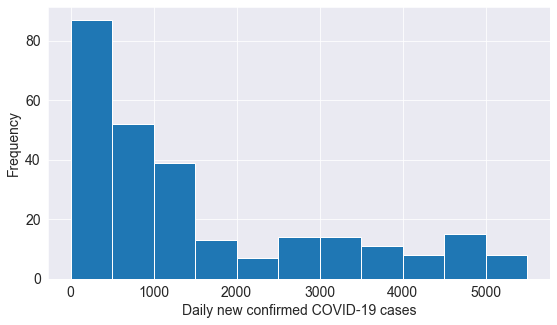

In [14]:
#plot histogram of number of new reported cases per day
plt.hist(covid_uk_df.new_cases, bins=np.arange(0, 6000, 500))

#set axis labels
plt.xlabel('Daily new confirmed COVID-19 cases');
plt.ylabel('Frequency');

**Observations:**

-Right skew, with the majority of days reporting less than 1000 new cases per day.

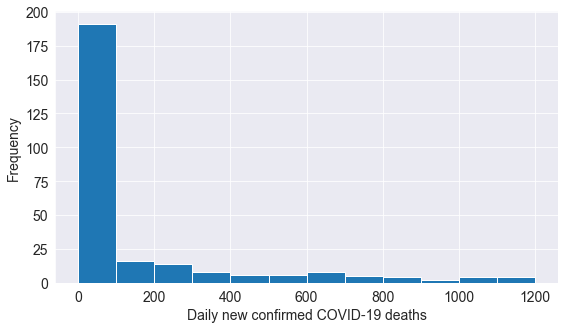

In [15]:
#plot histgram with number of new deaths per day
plt.hist(covid_uk_df.new_deaths, bins=np.arange(0, 1300, 100))

#set axis labels
plt.xlabel('Daily new confirmed COVID-19 deaths');
plt.ylabel('Frequency');

**Observations:**

-Right skew, with the majority of days reporting less than 100 new deaths per day.

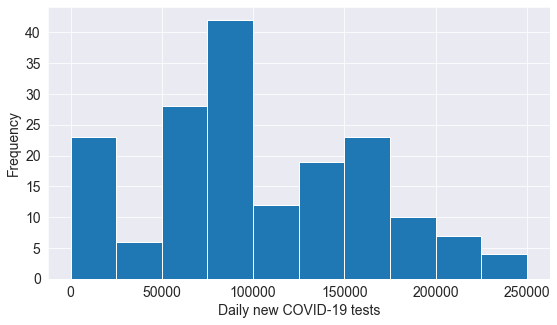

In [16]:
#plot histgram with number of new tests per day
plt.hist(covid_uk_df.new_tests, bins=np.arange(0, 275000,25000))

#set axis labels
plt.xlabel('Daily new COVID-19 tests');
plt.ylabel('Frequency');

### Bivariate Exploration

In [17]:
#isolate for variables of interest
focus_vars = ['new_cases', 'total_cases', 'new_tests', 'new_deaths', 'total_deaths', 'total_tests', 'positive_rate']

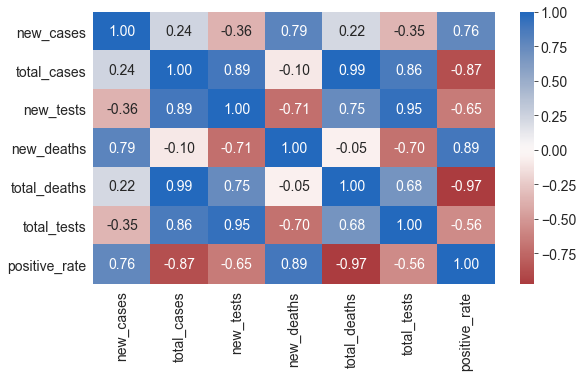

In [18]:
# correlation plot of numeric variables
sns.heatmap(covid_uk_df[focus_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0);

**Observations:**

- The number of reported cases and the number of deaths attributed to Covid-19 are highly correlated.
- The number of tests and the positive rate are inversely correlated.

<div class="alert alert-block alert-danger">
A word of caution:

1. Correlation does not imply causation. This means that although tests and deaths are inversely correlated, more testing does not necessarily lead to fewer fatalities.

2. Confounding variables are likely behind the correlations noted. For example, the positive rate is a composite measure of cases and tests, and therefore likely to influence the near perfect correlation between total deaths and the positive rate.  
</div>

<div class="alert alert-block alert-info">
The heatmap above measures linear relationship. Scatter plots are drawn to understand the presence of non-linear relationships. 
</div>

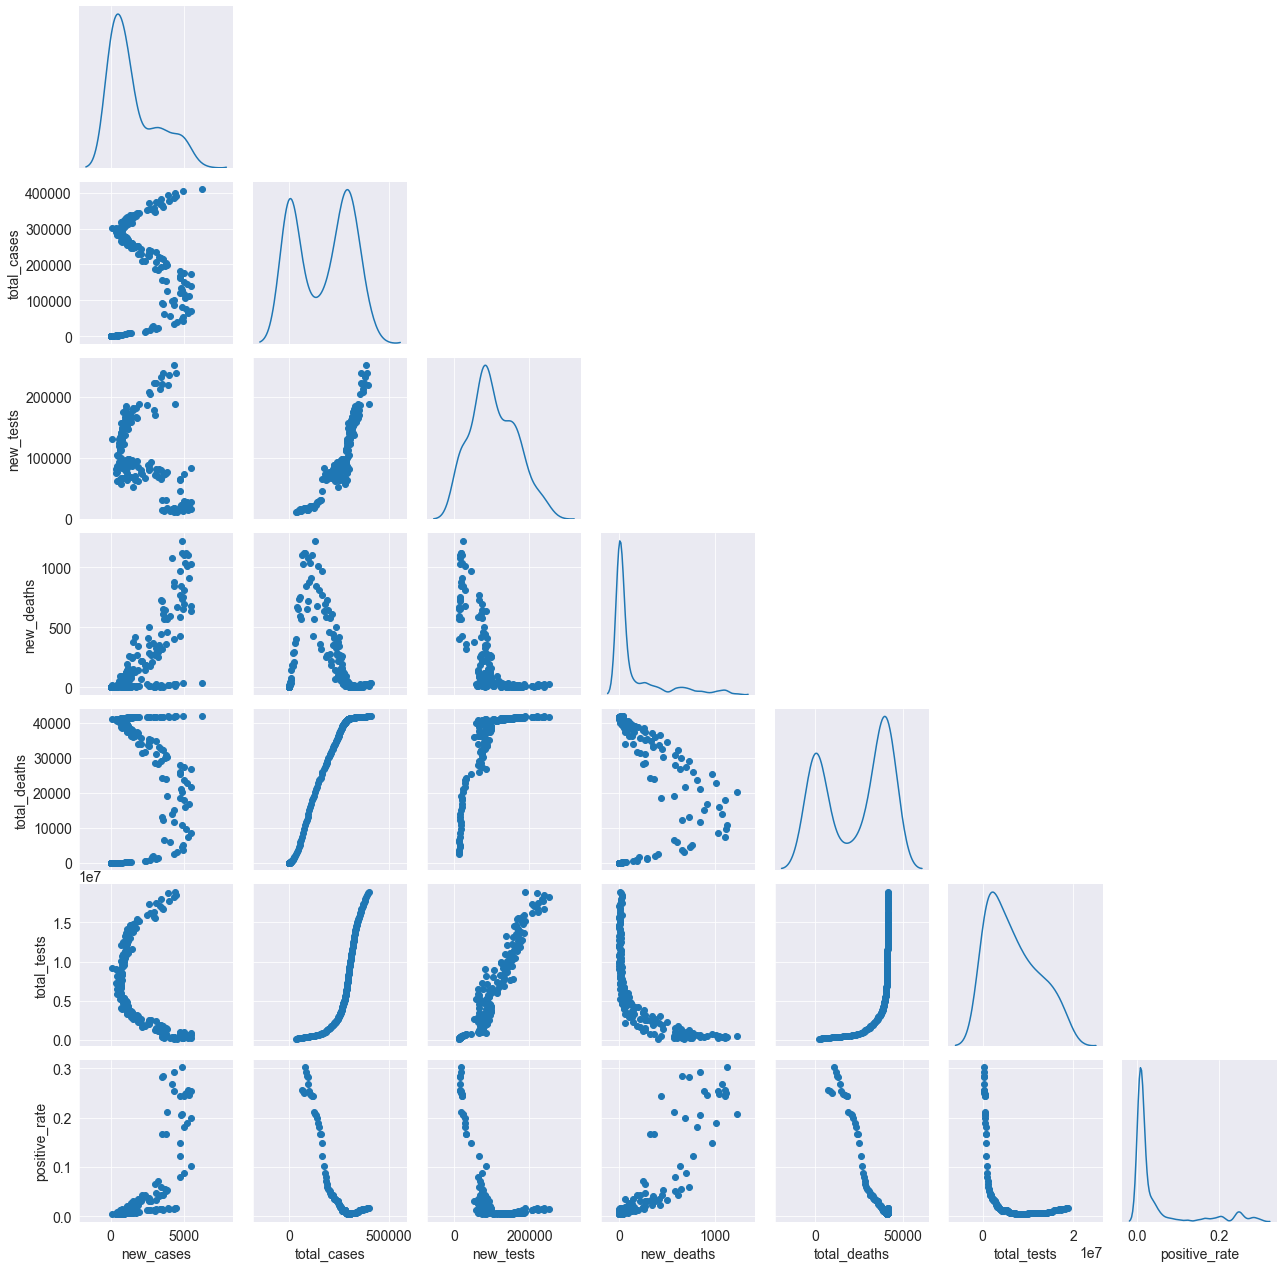

In [19]:
#pairwise plots of variables 
g = sns.PairGrid(data = covid_uk_df, vars = focus_vars, diag_sharey=False, corner=True)
g.map_lower(plt.scatter)
g.map_diag(sns.kdeplot);

**Observations:**

The presence of higher order correlations between most variables.

<a id='analysis'></a>

## Q & A

<div class="alert alert-block alert-info">
For all data sources on the pandemic, daily data does not necessarily refer to the number of new confirmed cases on that day – but to the cases reported on that day. Since reporting can vary from day to day – irrespectively of any actual variation of cases – it is therefore helpful to look at a longer time span, which is less affected by the daily variation in reporting. This provides a clearer picture of where the pandemic is accelerating, staying the same, or reducing. A rolling average (7-day window) is therefore used to smooth short term variations.
</div>



**Q: What is the daily number of confirmed cases?**

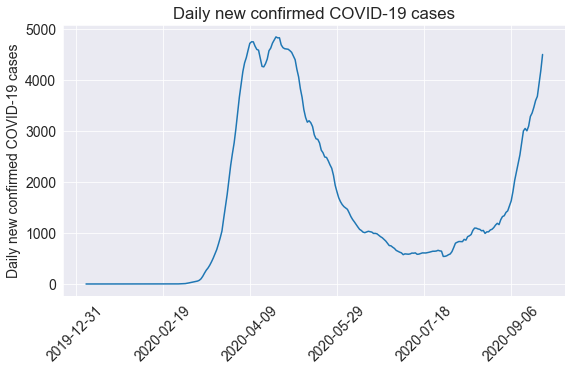

In [20]:
#plot line chart of number of new reported cases per day
covid_uk_df.new_cases_smoothed.plot()

#set title and axis labels
plt.title('Daily new confirmed COVID-19 cases')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Daily new confirmed COVID-19 cases');

**Q: What is the total number of reported cases related to covid-19 in the UK?**

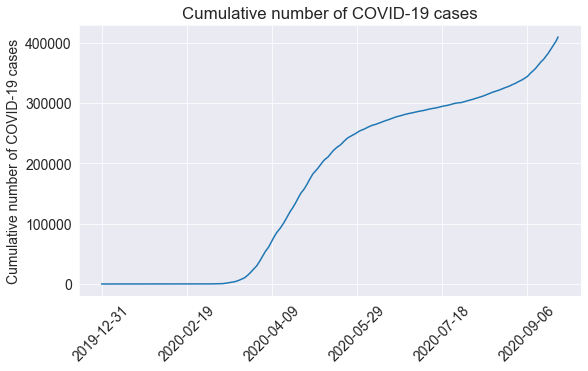

In [21]:
#plot line chart of cumulative cases
covid_uk_df.total_cases.plot()

#set title and axis labels
plt.title('Cumulative number of COVID-19 cases')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Cumulative number of COVID-19 cases');

**Observations:**
    
- The number of reported cases peaked at approx 4,900 on the 10th of April 2020. 
- Since the 18th of July the number of daily reported cases has once again begun to grow at an increasing rate. 

**Q: What is the daily number of confirmed deaths?**

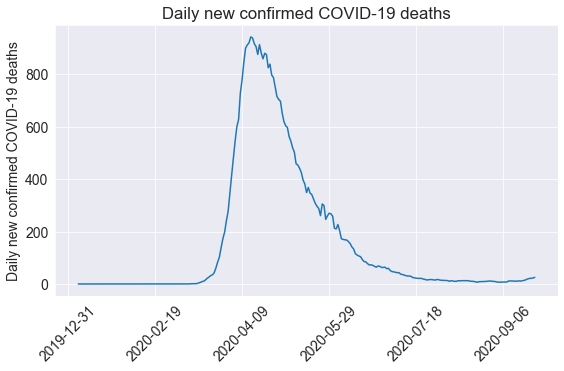

In [22]:
#plot line chart of new deaths per day
covid_uk_df.new_deaths_smoothed.plot()

#set title and axis labels
plt.title('Daily new confirmed COVID-19 deaths')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Daily new confirmed COVID-19 deaths');

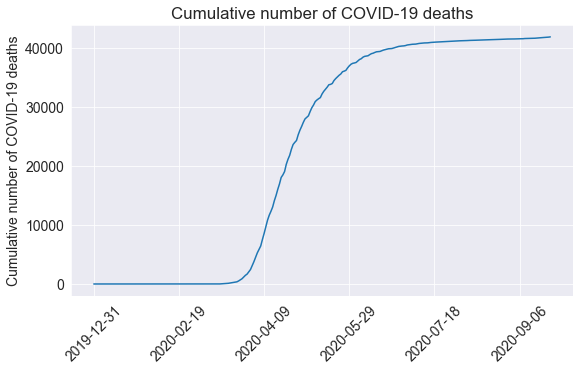

In [23]:
#plot line chart of cumulative deaths
covid_uk_df.total_deaths.plot()

#set title and axis labels
plt.title('Cumulative number of COVID-19 deaths')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Cumulative number of COVID-19 deaths');

**Observations:**
    
- Similar to the number of reported cases, the number of deaths peaked around the 10th of April 2020. Domain knowledge indicates the number of deaths should lag the number of cases by around 14 days. This is not clear from the data, raising questions about data consistency. A closer look at the literature reveals a change in the methodology used to calculate the number of deaths attributed to covid-19 on the 20th May & 3rd of July. The change included a retrospective revision to past figures, which is why our understanding of the progression of the the disease does not align with the data. 

- Given the rise in the number of reported daily cases, the number of daily confirmed deaths is expected to follow. 

The widely available data on confirmed cases only becomes meaningful when it can be interpreted in light of how much a country is testing. Are countries testing enough to monitor the outbreak?

<div class="alert alert-block alert-info">
The figure for number of tests refers to the actual number of tests performed, rather than the number of people tested. This figure will thus be higher if the same person is tested more than once.
</div>


**Q: What is the daily number of new tests?**

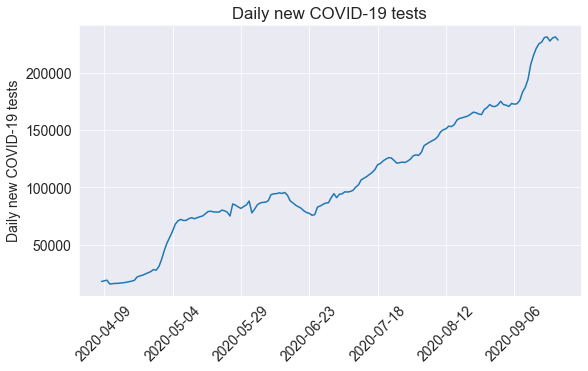

In [24]:
#plot line chart of new tests per day
covid_uk_df.new_tests_smoothed.plot()

#set title, position of tick marks, and axis labels
plt.title('Daily new COVID-19 tests')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Daily new COVID-19 tests');

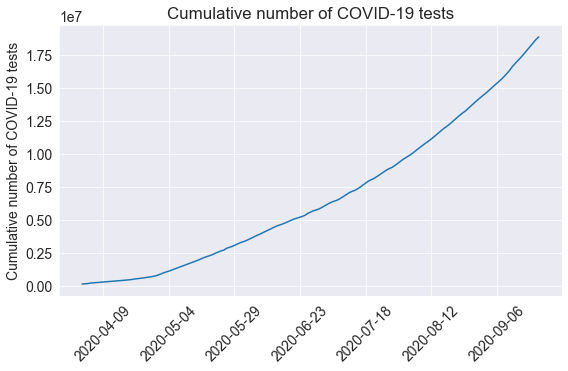

In [25]:
#plot line chart of cumulative tests
covid_uk_df.total_tests.plot()

#set title, position of tick marks, and axis labels
plt.title('Cumulative number of COVID-19 tests')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Cumulative number of COVID-19 tests');

**Observations:**

As capacity is built the number of daily tests continues to rise. 

**Q: What is the death rate (ratio of confirmed deaths to reported cases)?**

In [26]:
#create new variable by dividing exisiting variables element wise
covid_uk_df['death_rate_t'] = covid_uk_df.total_deaths / covid_uk_df.total_cases

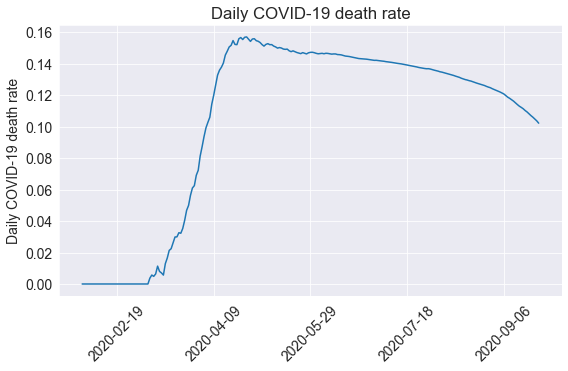

In [27]:
#plot line chart of death rate
covid_uk_df.death_rate_t.plot()

#set title, position of tick marks, and axis labels
plt.title('Daily COVID-19 death rate')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Daily COVID-19 death rate');

**Observations:**

At the height of the pandamic when testing was limited, the 'death' rate peaked at around 16%. This steadily decreased as the number of tests increased and is currently at around 10%. 

<div class="alert alert-block alert-danger">
A word of caution:

This does not mean that around 10% of people who contract the virus will suffer a fatality. The true number is likely to lower given many cases are asymptomatic, and yet many more cases are never diagnosed. 
</div>
    





One important way to understand if countries are testing sufficiently is to ask: What share of the tests confirm a case? What is the positive rate?

**Q: What fraction of test returned a positive result?**

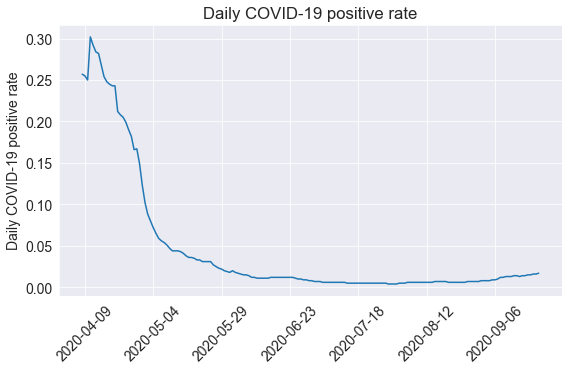

In [28]:
#plot line chart of positive rate
covid_uk_df.positive_rate.plot()

#set title, position of tick marks, and axis labels
plt.title('Daily COVID-19 positive rate')
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('Daily COVID-19 positive rate');

<div class="alert alert-block alert-info">
A country is not testing adequately when it is finding a case for every few tests they perform. Here it is likely that the true number of new cases is much higher than the number of cases that were confirmed by tests. The WHO has suggested a positive rate of between 3% and 10% as a general benchmark of adequate testing.
</div>




**Q: How many cases, deaths and tests were recorded for each day of the month?**

In [29]:
#return date index to columns
covid_uk_df.reset_index(inplace=True)

In [30]:
#convert data column to datetime object
covid_uk_df['date'] = pd.to_datetime(covid_uk_df.date)

In [31]:
#extract year, month, day, and weekday from date variable and create new column for each
covid_uk_df['year'] = pd.DatetimeIndex(covid_uk_df.date).year
covid_uk_df['month'] = pd.DatetimeIndex(covid_uk_df.date).month
covid_uk_df['day'] = pd.DatetimeIndex(covid_uk_df.date).day
covid_uk_df['weekday'] = pd.DatetimeIndex(covid_uk_df.date).weekday
covid_uk_df

,date,new_cases,new_cases_smoothed,total_cases,new_tests,new_deaths,new_deaths_smoothed,total_deaths,new_tests_smoothed,total_tests,positive_rate,death_rate_t,year,month,day,weekday
0,2019-12-31,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2019,12,31,1
1,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020,1,1,2
2,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020,1,2,3
3,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020,1,3,4
4,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2020-09-20,4422.0,3597.714,390358.0,239885.0,27.0,19.429,41759.0,230321.0,18488762.0,0.016,0.106976,2020,9,20,6
265,2020-09-21,3899.0,3679.000,394257.0,219723.0,18.0,21.286,41777.0,231257.0,18708484.0,0.016,0.105964,2020,9,21,0
266,2020-09-22,4368.0,3928.571,398625.0,188865.0,11.0,21.571,41788.0,228564.0,18897349.0,0.017,0.104830,2020,9,22,1
267,2020-09-23,4926.0,4189.000,403551.0,NaN,37.0,23.000,41825.0,NaN,NaN,NaN,0.103642,2020,9,23,2


In [32]:
#exclude incomplete months, i.e current month
covid_uk_exsep = covid_uk_df[covid_uk_df.month != 9].copy()
covid_uk_exsep

,date,new_cases,new_cases_smoothed,total_cases,new_tests,new_deaths,new_deaths_smoothed,total_deaths,new_tests_smoothed,total_tests,positive_rate,death_rate_t,year,month,day,weekday
0,2019-12-31,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2019,12,31,1
1,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020,1,1,2
2,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020,1,2,3
3,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020,1,3,4
4,2020-01-04,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2020-08-27,1048.0,1106.857,328846.0,184461.0,16.0,9.714,41465.0,169546.0,13633416.0,0.007,0.126092,2020,8,27,3
241,2020-08-28,1522.0,1155.429,330368.0,178203.0,12.0,10.571,41477.0,172228.0,13823629.0,0.007,0.125548,2020,8,28,4
242,2020-08-29,1276.0,1190.143,331644.0,168684.0,9.0,11.571,41486.0,170658.0,13992972.0,0.007,0.125092,2020,8,29,5
243,2020-08-30,1108.0,1164.429,332752.0,170574.0,12.0,10.714,41498.0,170542.0,14163546.0,0.007,0.124711,2020,8,30,6


In [33]:
#sum cases, deaths and tests by day of the month
covid_uk_exsep = covid_uk_exsep.groupby('day')[['new_cases', 'new_deaths', 'new_tests']].sum()

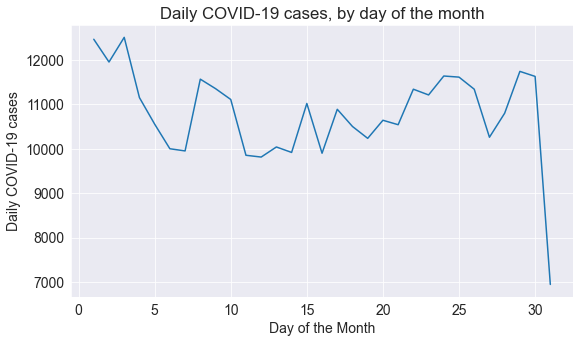

In [34]:
#plot line chart of new cases by day of the month
covid_uk_exsep.new_cases.plot()

#set title, position of tick marks, and axis labels
plt.title('Daily COVID-19 cases, by day of the month')
plt.xlabel('Day of the Month')
plt.ylabel('Daily COVID-19 cases');

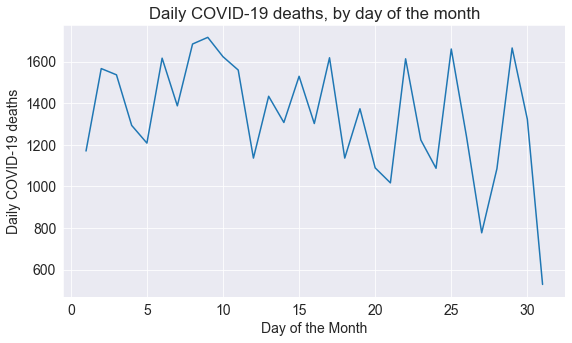

In [35]:
#plot line chart of new cases by day of the month
covid_uk_exsep.new_deaths.plot()

#set title, position of tick marks, and axis labels
plt.title('Daily COVID-19 deaths, by day of the month')
plt.xlabel('Day of the Month')
plt.ylabel('Daily COVID-19 deaths');

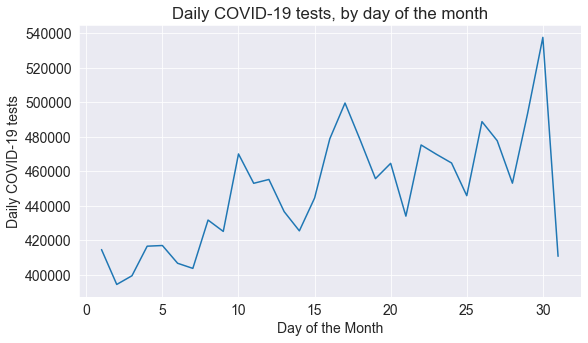

In [36]:
#plot line chart of new tests by day of the month
covid_uk_exsep.new_tests.plot()

#set title, position of tick marks, and axis labels
plt.title('Daily COVID-19 tests, by day of the month')
plt.xlabel('Day of the Month')
plt.ylabel('Daily COVID-19 tests');

**Observations:**

Variation in the number of deaths attributed to covid-19 increases in the last 10 days of each month. Perhaps, this is linked to the increased number of tests conducted during the same period. Whether these findings are statistically and/or practically significant would require further investigation.

**Q: How many cases, deaths and tests were recorded for each day of the week?**

In [37]:
# sum cases, deaths and tests by day of the month (monday is 0)
covid_weekday_df = covid_uk_df.groupby('weekday')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_weekday_df

,new_cases,new_deaths,new_tests
weekday,,,
0,51237.0,3527.0,2430179.0
1,47857.0,3645.0,2245991.0
2,60998.0,7930.0,2457385.0
3,65190.0,7254.0,2749636.0
4,62796.0,6359.0,2864353.0
5,62619.0,7083.0,2912626.0
6,59032.0,6064.0,2742976.0


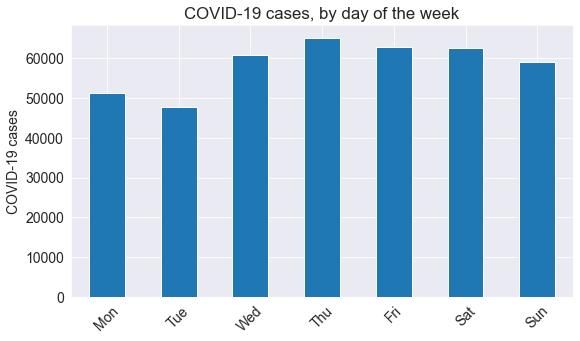

In [38]:
#plot line chart of new cases by day of the week
covid_weekday_df.new_cases.plot(kind='bar')

#set title, position of tick marks, and axis labels
plt.title('COVID-19 cases, by day of the week')
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(0, 7), day, rotation=45)
plt.xlabel('')
plt.ylabel('COVID-19 cases');

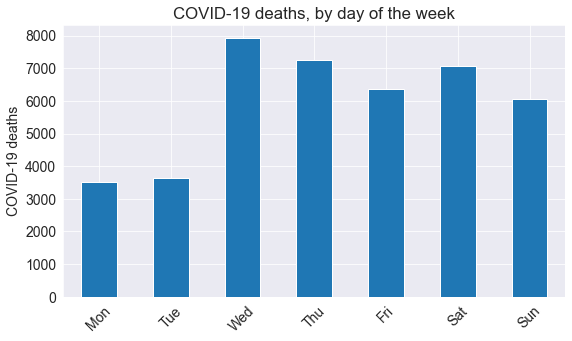

In [39]:
#plot line chart of new deaths by day of the week
covid_weekday_df.new_deaths.plot(kind='bar')

#set title, position of tick marks, and axis labels
plt.title('COVID-19 deaths, by day of the week')
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(0, 7), day, rotation=45)
plt.xlabel('')
plt.ylabel('COVID-19 deaths');

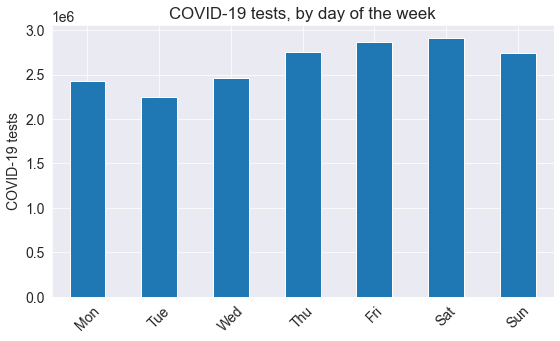

In [40]:
#plot line chart of new tests by day of the week
covid_weekday_df.new_tests.plot(kind='bar')

#set title, position of tick marks, and axis labels
plt.title('COVID-19 tests, by day of the week')
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(0, 7), day, rotation=45)
plt.xlabel('')
plt.ylabel('COVID-19 tests');

**Observations:**

The number of deaths attributed to Covid-19 reach a lull on Monday & Tuesday. This may be due to beauracratic idiosyncracies rather than an accurate model of reality.

In [41]:
#save output to csv file
covid_uk_df.to_csv('results.csv', index=False)

<a id='conclusion'></a>

## Conclusion

### Summary

1. The number of reported cases peaked at approx 4,900 on the 10th of April 2020. 
2. Since the 18th of July the number of daily reported cases has once again begun to grow.
3. Given the rise in the number of reported daily cases, the number of daily confirmed deaths is expected to follow.
4. As capacity is built the number of daily tests continues to rise.
5. Variation in the number of deaths reported increases from the 20th day of each month.
6. The number of tests performed also increases toward the end of each month.
7. Signifacantly fewer deaths are confirmed on Monday & Tuesday.


The number of daily reported new cases has recently reached levels last witnessed during the height of the pandemic in early April. However, the number of daily covid-19 tests conducted in September is more than 4 times higher than what it was in early April. This suggests the number of cases that go undetected is far lower. So although the number of cases is increasing, the fatality rate (or how dangerous the virus is) is not expected to changed markedly. This is supported by the 'death' rate and the positive rate, both of which have remained steady.

### Limitations:

What is important to note about these case figures?
- The reported case figures on a given date does not necessarily show the number of new cases on that day: this is due to delays in reporting.
- Keep in mind these are offically reported numbers, and the actual number of cases and deaths may be higher, as not all cases are diagnosed. 
- The actual number of cases is also likely to be much higher than the number of confirmed cases – this is due to limited testing.
- Comorbidiy. Covid-19 may be a contributing factor but perhaps not the only cause of death.

### Directions for Further Research

<div class="alert alert-block alert-success">
1. Statistical & Practical significance of day of the month/week differences
</div>



 